In [23]:
# отключим всякие предупреждения Anaconda
import warnings

warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd

pd.set_option("display.max.columns", 100)

%matplotlib inline
import seaborn as sns
from matplotlib import pyplot as plt

In [10]:
train_df = pd.read_csv('data/train.csv', index_col='id')
test_df = pd.read_csv('data/test.csv', index_col='id')
submission = pd.read_csv('data/sample_submission.csv', index_col='id')


## Feature analysis.

In [26]:
train_df.shape, test_df.shape

((39074, 15), (9768, 14))

In [24]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39074 entries, 9768 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              39074 non-null  int64 
 1   workclass        39074 non-null  object
 2   fnlwgt           39074 non-null  int64 
 3   education        39074 non-null  object
 4   educational-num  39074 non-null  int64 
 5   marital-status   39074 non-null  object
 6   occupation       39074 non-null  object
 7   relationship     39074 non-null  object
 8   race             39074 non-null  object
 9   gender           39074 non-null  object
 10  capital-gain     39074 non-null  int64 
 11  capital-loss     39074 non-null  int64 
 12  hours-per-week   39074 non-null  int64 
 13  native-country   39074 non-null  object
 14  is_rich          39074 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 4.8+ MB


In [28]:
train_df = train_df.drop_duplicates()

## EDA

In [30]:
numerical_columns = train_df.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = train_df.select_dtypes(include=['object']).columns


### Количественные

In [32]:
train_df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,is_rich
count,39040.000000,3.904000e+04,39040.000000,39040.00000,39040.000000,39040.000000,39040.000000
mean,38.702485,1.896029e+05,10.075538,1047.08499,87.469544,40.435528,0.239626
std,13.728996,1.059024e+05,2.571492,7305.96625,403.874102,12.375142,0.426861
min,17.000000,1.228500e+04,1.000000,0.00000,0.000000,1.000000,0.000000
25%,28.000000,1.174912e+05,9.000000,0.00000,0.000000,40.000000,0.000000
50%,37.000000,1.781445e+05,10.000000,0.00000,0.000000,40.000000,0.000000
75%,48.000000,2.370682e+05,12.000000,0.00000,0.000000,45.000000,0.000000
max,90.000000,1.490400e+06,16.000000,99999.00000,4356.000000,99.000000,1.000000


In [33]:
test_df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,9768.000000,9.768000e+03,9768.000000,9768.000000,9768.000000,9768.000000
mean,38.439394,1.899446e+05,10.092138,1210.649365,87.937858,40.376331
std,13.625722,1.044489e+05,2.563758,8020.069335,400.204231,12.462573
min,17.000000,1.487800e+04,1.000000,0.000000,0.000000,1.000000
25%,27.000000,1.177988e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781135e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.387908e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.184622e+06,16.000000,99999.000000,3770.000000,99.000000


In [ ]:
def plot_distribution_pairs(train, test, feature, hue="set", palette=None):
    df = train.copy()
    df["set"] = "train"    
    df = pd.concat([df, test.copy()]).fillna("test")
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    
    fig, ax = plt.subplots(1, 2, figsize=(13,4))
    for i, s in enumerate(df[hue].unique()):
        selection = df.loc[df[hue]==s, feature]
        with warnings.catch_warnings():
            warnings.simplefilter("ignore", category=FutureWarning)
            g_hist = sns.histplot(selection, ax=ax[0], label=s)
            g_box = sns.boxplot(x=hue, y=feature, data=df, ax=ax[1])
    
    ax[0].set_title(f"Paired train/test distributions of {feature}")
    ax[1].set_title(f"Paired train/test boxplots of {feature}")
    
    g_hist.legend()
    plt.show()

for feature in numerical_columns[:-1]:
    plot_distribution_pairs(train_df, test_df, feature)

### Категориальные

In [39]:
for feature in categorical_columns:
    print(f"{feature}: {sorted(train_df[feature].unique())}")
    print(f"{feature}: {sorted(test_df[feature].unique())}")  

workclass: ['?', 'Federal-gov', 'Local-gov', 'Never-worked', 'Private', 'Self-emp-inc', 'Self-emp-not-inc', 'State-gov', 'Without-pay']
workclass: ['?', 'Federal-gov', 'Local-gov', 'Never-worked', 'Private', 'Self-emp-inc', 'Self-emp-not-inc', 'State-gov', 'Without-pay']
education: ['10th', '11th', '12th', '1st-4th', '5th-6th', '7th-8th', '9th', 'Assoc-acdm', 'Assoc-voc', 'Bachelors', 'Doctorate', 'HS-grad', 'Masters', 'Preschool', 'Prof-school', 'Some-college']
education: ['10th', '11th', '12th', '1st-4th', '5th-6th', '7th-8th', '9th', 'Assoc-acdm', 'Assoc-voc', 'Bachelors', 'Doctorate', 'HS-grad', 'Masters', 'Preschool', 'Prof-school', 'Some-college']
marital-status: ['Divorced', 'Married-AF-spouse', 'Married-civ-spouse', 'Married-spouse-absent', 'Never-married', 'Separated', 'Widowed']
marital-status: ['Divorced', 'Married-AF-spouse', 'Married-civ-spouse', 'Married-spouse-absent', 'Never-married', 'Separated', 'Widowed']
occupation: ['?', 'Adm-clerical', 'Armed-Forces', 'Craft-repai

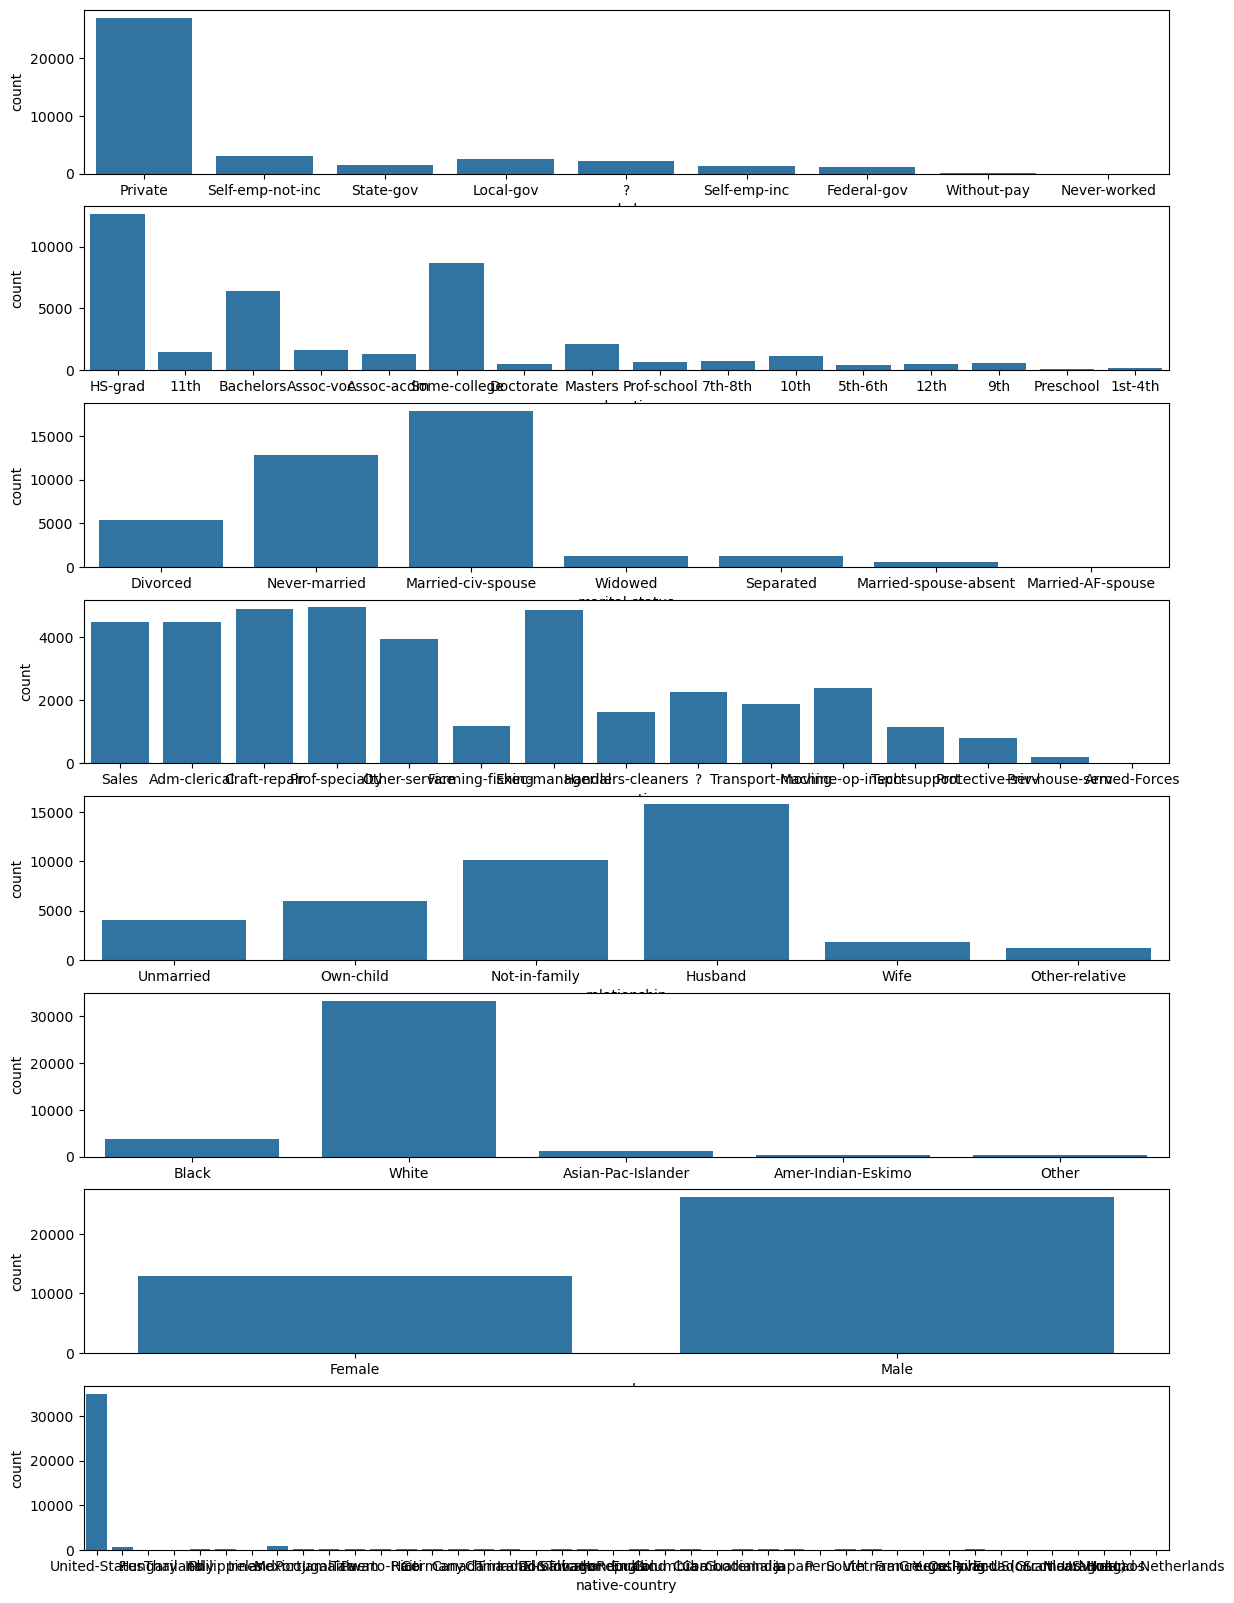

In [40]:
fig, ax = plt.subplots(nrows=len(categorical_columns), ncols=1, figsize=(14,20))
for i, column in enumerate(categorical_columns):
    sns.countplot(ax=ax[i], data=train_df, x=column);
    

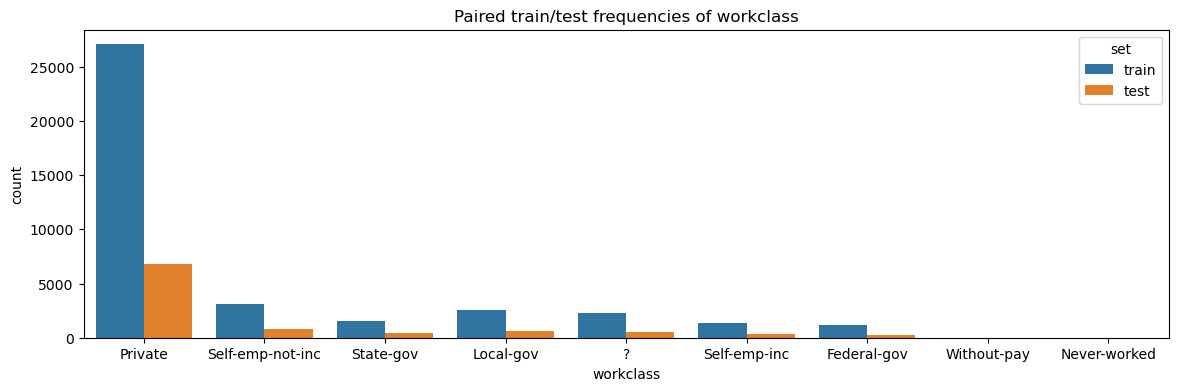

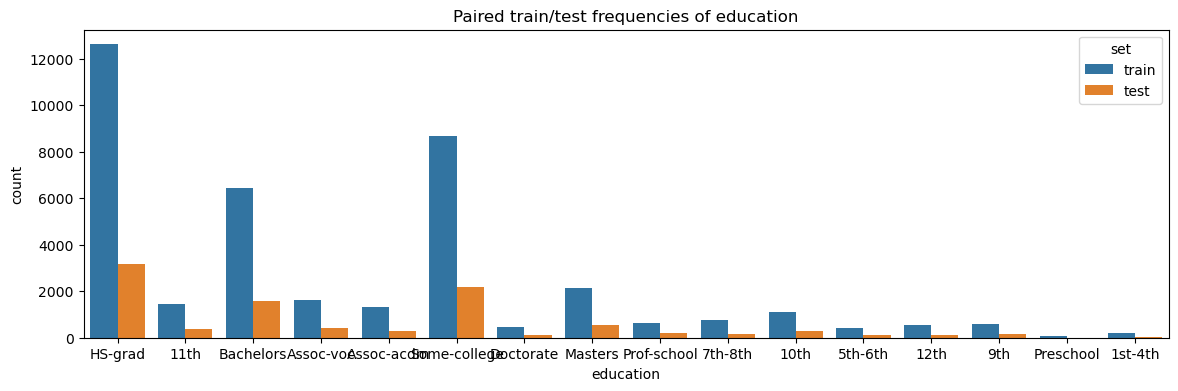

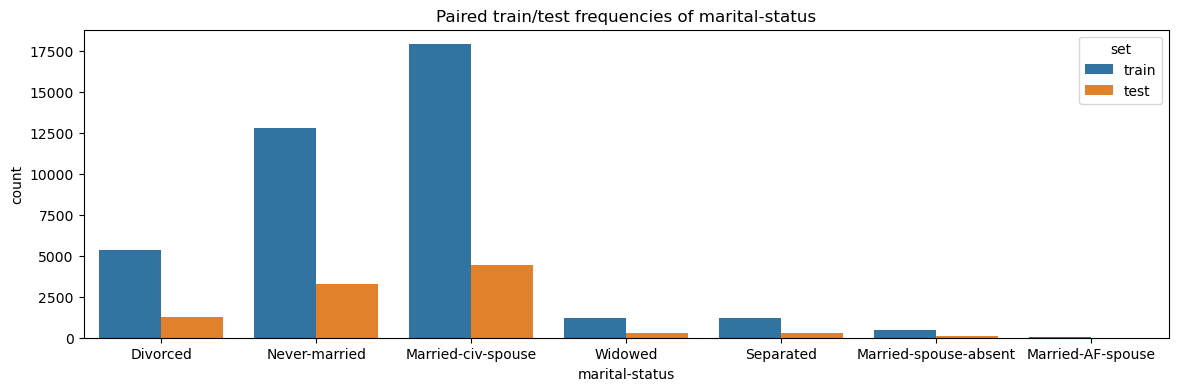

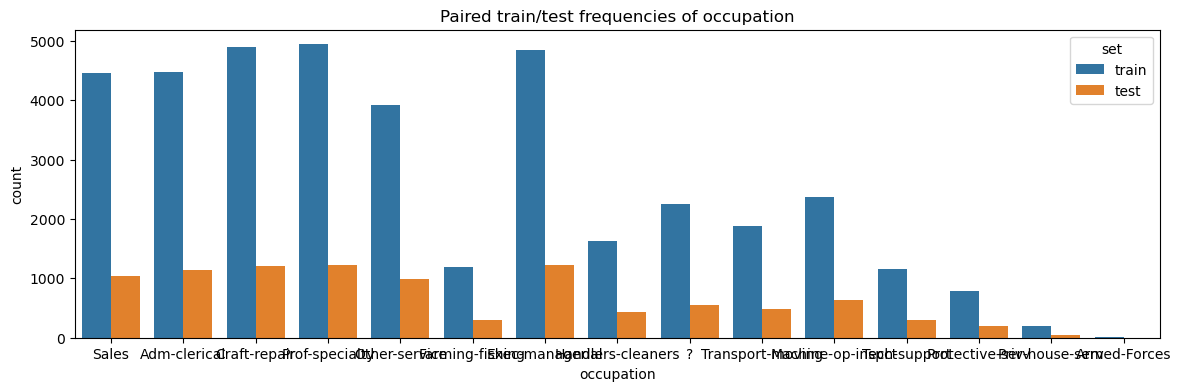

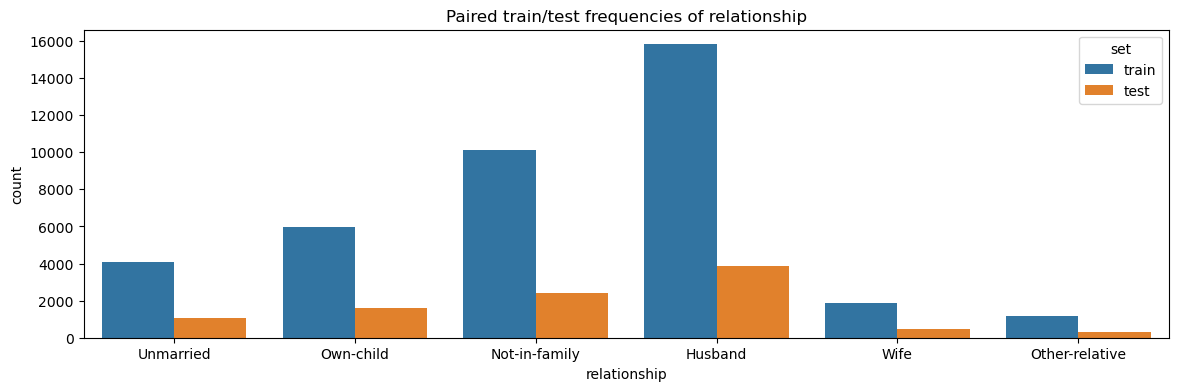

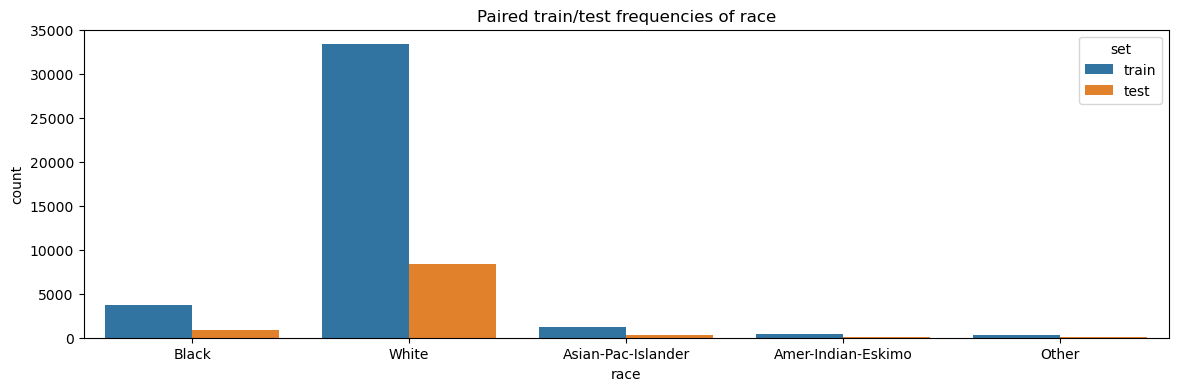

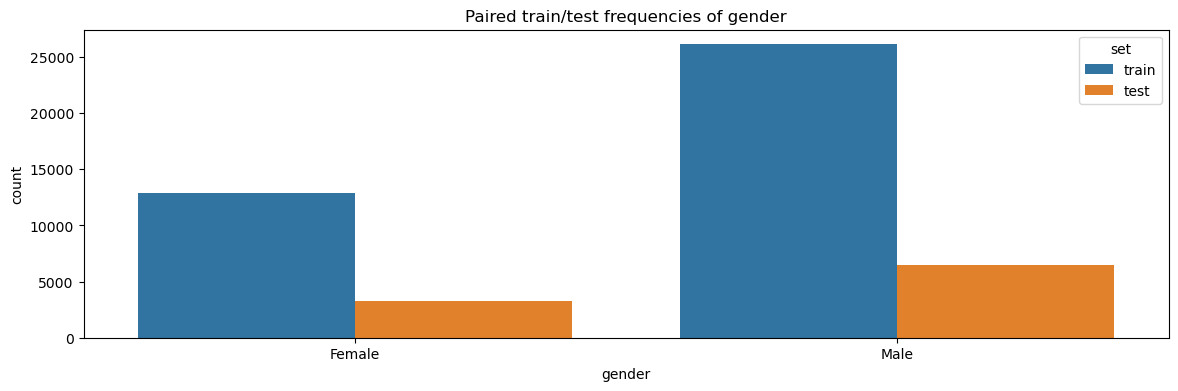

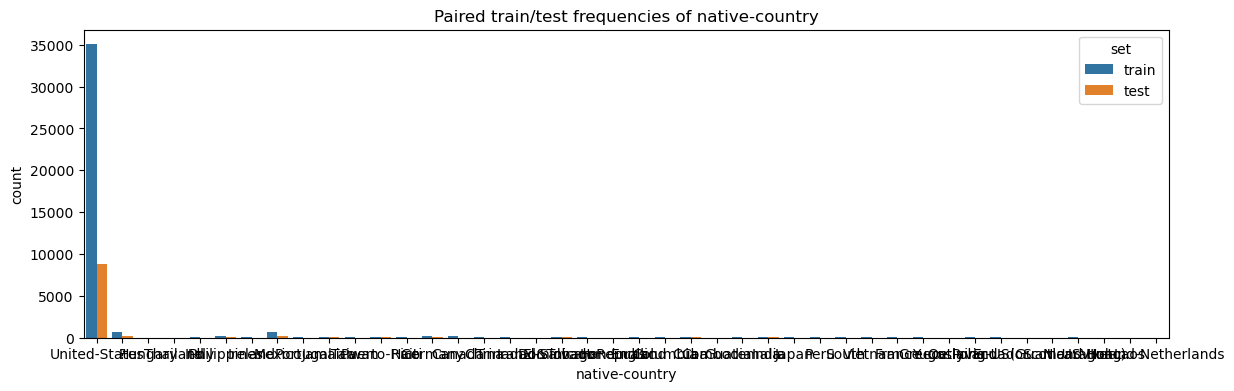

In [43]:
def plot_count_pairs(train, test, feature, hue="set"):
    df = train.copy()
    df["set"] = "train"
    df = pd.concat([df, test.copy()]).fillna("test")
    
    f, ax = plt.subplots(1, 1, figsize=(14, 4))
    sns.countplot(data=df, x=feature, hue=hue)
    ax.set_title(f"Paired train/test frequencies of {feature}")

for feature in categorical_columns:
    plot_count_pairs(train_df, test_df, feature)

### Взаимодействие признаков.

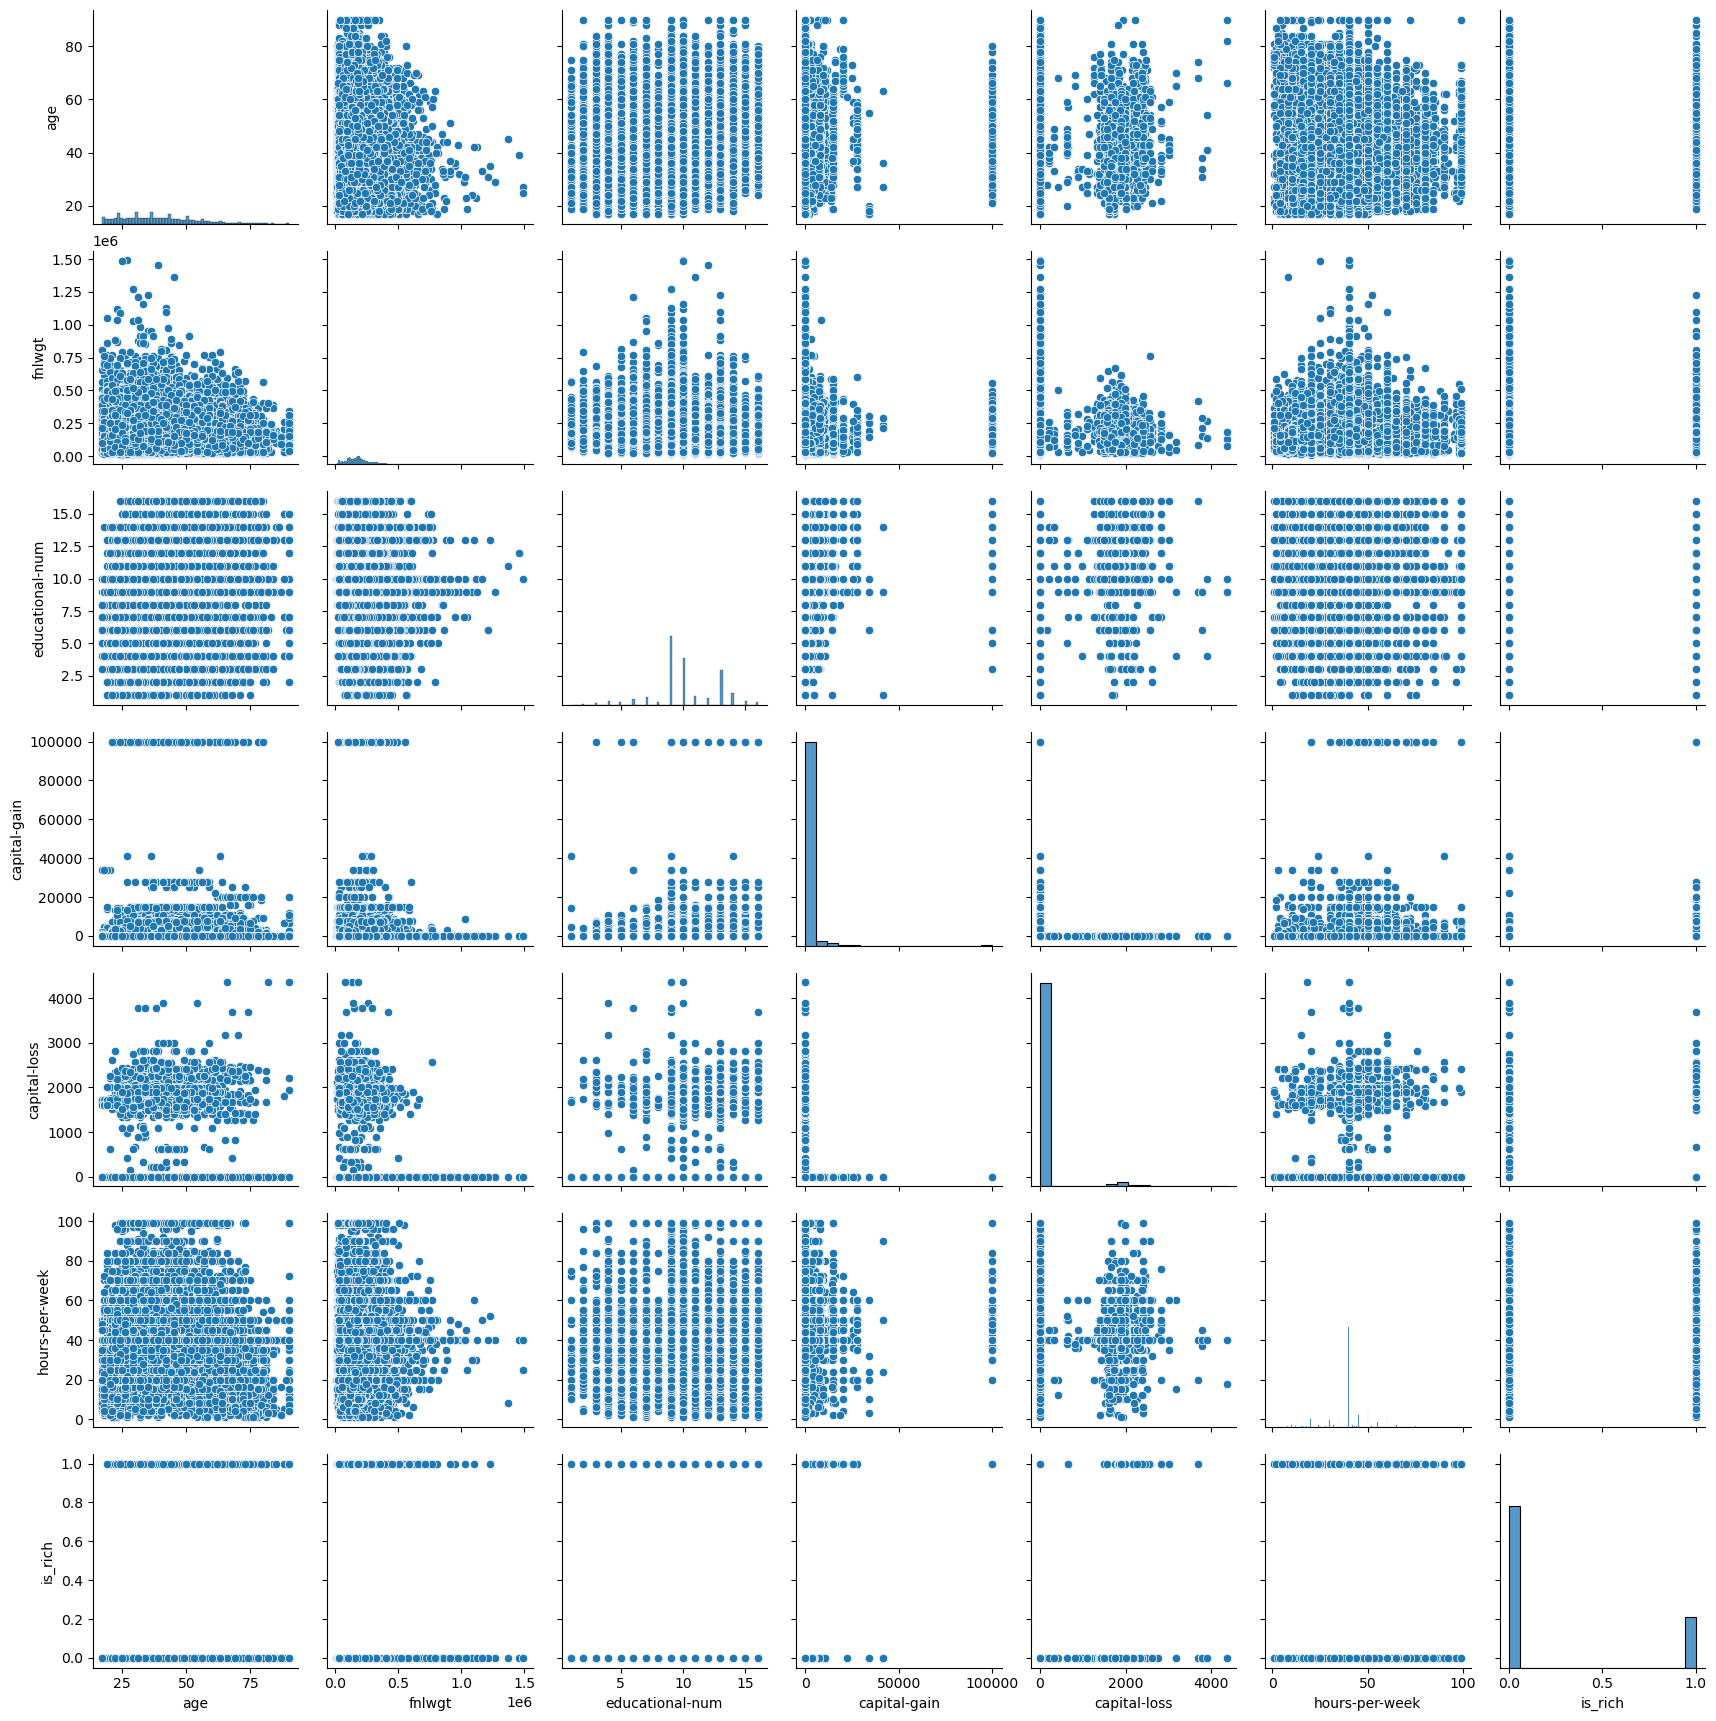

In [44]:
sns.pairplot(data=train_df)

## Modeling

### CatBoost

In [53]:
from sklearn.model_selection import train_test_split
from catboost.utils import eval_metric

from catboost import Pool
from catboost import CatBoostClassifier
import numpy as np

In [52]:
target_columns = ['is_rich']
numerical_columns = test_df.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = test_df.select_dtypes(include=['object']).columns

X_train, X_val, y_train, y_val = train_test_split(train_df.drop(target_columns, axis=1), train_df[target_columns], test_size=0.3, random_state=42)

cat_train_pool = Pool(X_train, y_train, cat_features=np.array(categorical_columns))
cat_val_pool = Pool(X_val, y_val, cat_features=np.array(categorical_columns)) 
cat_test_pool = Pool(test_df, cat_features=np.array(categorical_columns)) 
 

In [57]:
def calc_test_quality(train_pool, val_pool, test_pool, **kwargs):
    model = CatBoostClassifier(**kwargs, random_seed=42)
    model.fit(train_pool, verbose=100, eval_set=val_pool)
    y_pred = model.predict_proba(test_pool)
    return 


In [68]:
params ={
    'verbose': 100,
    "eval_metric" : 'TotalF1'}

In [69]:
model_cat = CatBoostClassifier(
    **params,
    random_seed=42)
model_cat.fit(cat_train_pool, eval_set=cat_val_pool)

Learning rate set to 0.071738
0:	learn: 0.8351501	test: 0.8336236	best: 0.8336236 (0)	total: 38.2ms	remaining: 38.2s
100:	learn: 0.8653971	test: 0.8617364	best: 0.8618141 (99)	total: 4.28s	remaining: 38.1s
200:	learn: 0.8742703	test: 0.8668866	best: 0.8669855 (196)	total: 8.75s	remaining: 34.8s
300:	learn: 0.8793326	test: 0.8692933	best: 0.8694122 (295)	total: 13.4s	remaining: 31s
400:	learn: 0.8842801	test: 0.8690009	best: 0.8699826 (335)	total: 18s	remaining: 26.9s
500:	learn: 0.8877408	test: 0.8688272	best: 0.8699826 (335)	total: 22.3s	remaining: 22.2s
600:	learn: 0.8905518	test: 0.8676934	best: 0.8699826 (335)	total: 26.8s	remaining: 17.8s
700:	learn: 0.8935192	test: 0.8680803	best: 0.8699826 (335)	total: 31.4s	remaining: 13.4s
800:	learn: 0.8966137	test: 0.8667867	best: 0.8699826 (335)	total: 35.9s	remaining: 8.93s
900:	learn: 0.8990019	test: 0.8671193	best: 0.8699826 (335)	total: 40.9s	remaining: 4.49s
999:	learn: 0.9023679	test: 0.8670823	best: 0.8699826 (335)	total: 45.2s	remai

In [74]:
submission['is_reach'] = model_cat.predict(cat_test_pool)
submission.to_csv("submission_classification.csv")

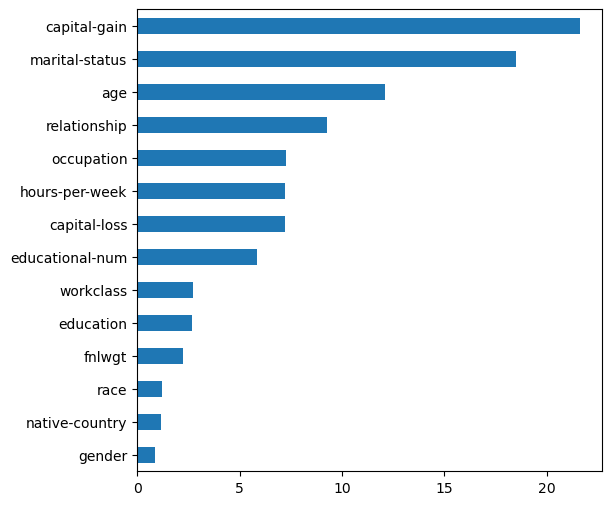

In [77]:
pd.Series(model_cat.feature_importances_, index = X_train.columns).nlargest(20).plot(kind = 'barh',
                                                                               figsize = (6, 6),
                                                                              ).invert_yaxis();